In [1]:
import os
import pathlib
import glob
import numpy as np
import pandas as pd
import sidetable

import bulwark.checks as ck
import bulwark.decorators as dc

import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
titanic = sns.load_dataset('titanic')
titanic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [148]:
titanic['class'].value_counts(normalize=True)
titanic.stb.missing(clip_0=True, style=True)

,missing,total,percent
deck,688,891,77.22%
age,177,891,19.87%
embarked,2,891,0.22%
embark_town,2,891,0.22%


In [153]:
summary_table = titanic.groupby(['sex', 'class', 'embark_town']).agg({'fare': ['sum']})
summary_table.stb.subtotal(sub_level=[1, 2]).to_clipboard()

In [87]:
 dtypes=dict(
    PCLASS=np.int64,
    AGE=np.float64, 
    SIBSP=np.int64,   
    PARCH=np.int64,   
    FARE=np.float64, 
    ADULT_MALE=np.bool,    
    ALONE=np.bool
    )    

@dc.IsShape((None, 15))
@dc.HasDtypes(items=dtypes)
def titanic_output(titanic):
    output=(    titanic
                    .rename(columns=str.upper)
                    .rename(columns=str.strip)
       )
    return output

In [88]:
df=titanic_output(titanic)

In [89]:
df

,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [99]:
df = pd.DataFrame({
                        "A": ["foo", "foo", "foo", "foo", "foo","bar", "bar", "bar", "bar"],
                        "B": ["one", "one", "one", "two", "two","one", "one", "two", "two"],
                        "C": ["small", "large", "large", "small","small", "large", "small", "small","large"],
                        "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                        "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]},
                        index=list('abcdefghi')
                  )
df

,A,B,C,D,E
a,foo,one,small,1,2
b,foo,one,large,2,4
c,foo,one,large,2,5
d,foo,two,small,3,5
e,foo,two,small,3,6
f,bar,one,large,4,6
g,bar,one,small,5,8
h,bar,two,small,6,9
i,bar,two,large,7,9


In [101]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=[np.sum, lambda x: len(x.unique())])
table

sum       <lambda>      
C       large small    large small
A   B                             
bar one   4.0   5.0      1.0   1.0
    two   7.0   6.0      1.0   1.0
foo one   4.0   1.0      1.0   1.0
    two   NaN   6.0      NaN   1.0

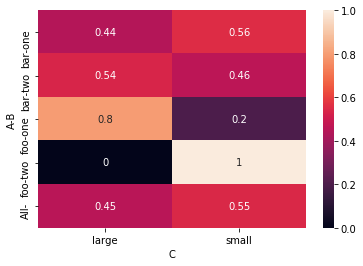

In [128]:
otrodf=pd.crosstab([df.A, df.B],df.C,
                   values=df.D, 
                   aggfunc=np.sum, 
                   normalize='index',
                   margins=True
                   )
sns.heatmap(otrodf,annot=True)

In [9]:
ruta_base=pathlib.Path(r'C:/Users/benito/Documents/datasets/babynames/')
ruta_base


WindowsPath('C:/Users/benito/Documents/datasets/babynames')

In [15]:
df_list = (pd.read_csv(f, names=['name', 'sex','births']) for f in ruta_base.glob('*.txt'))
df = pd.concat(df_list, ignore_index=True)
df.stb.freq(['sex'])

,sex,count,percent,cumulative_count,cumulative_percent
0,F,1003985,59.37985,1003985,59.37985
1,M,686799,40.62015,1690784,100.00000
